In [1]:
### Auto reloading moduls
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpFunctions import *
from generateGLV import *
from fitGLV import *
from mpl_toolkits.mplot3d import Axes3D
import time

This script will run a long loop. -> Hence we want to ignore all warnigns!

In [3]:
import warnings 
warnings.filterwarnings('ignore')

# ExploreFit
In this notebook we will explore the different conditions on how good one can fit. For this we generate many timeseries for one condition and then compute the summarising value for those. Based on those many result we then make plots from which we draw our conclusion. 

Since it is pretty impossible to store everything in RAM, since this will be huge -> We will compute setting per setting and only save the most important from the generated timeseries. 

What we will do is just store the X,Y of each setting generated. -> Such that latter, if needed, one can again start from computing those.
Ok after calculating. For a simple grid -> Computing all data and storing all X, Y values would cost intotal 13 GB of space... We have that but it is not worth it + that would also take an insane amount of time. So we skip the saving of the data. What we do can do however is store the real matrix, the fitted matrix and the variance. 

We do accumalate our results from the different settings and also store those. Such that it does not need to be computed afterwards. (but this could be done really quick (normally)).

In [3]:
# First define the setting grid over which we want to loop.
noiseStrength = np.array([0.00001,0.0001,0.001,0.01,0.05,0.1,1])
noiseLen = len(noiseStrength)
interStength = np.array([0.,0.01,0.05,0.1,0.5,1,1.5])
interLen = len(interStength)
pertu = np.array([1000,50,20,10,5,1])
pertuLen = len(pertu)
shape = (pertuLen,noiseLen,interLen)
# 7*7*6 = 294

In [5]:
# Default
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

------
Big for loop that will loop over everything


In [4]:
numberSpecies = 5
numberExperiments = 50

Now for each setting we want to summarise to summarise the setting. We have 12 summarising values. That we want to store. For that we each need to compute mean and std. And also store that. 

In [5]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

Important settings of series 1

- Settings are: 
    - Noise = np.array([0.00001,0.0001,0.001,0.01,0.05,0.1,1])
    - InteractionStrength np.array([0.,0.01,0.05,0.1,0.5,1,1.5])
    - Pertu = np.array([1000,50,20,10,5,1])
    - Order (i,j,k) = (pertu,Noise,Inter)
- NoiseType = "LangevinLinear
- PertuStrenght = 0.05
- Pertubation type Random
- Timestep = 0.01
- TMax = 100
- Intergration Type = euler
- SteadyState = all 1
- numberspecies = 5
- number of Exp = 50
- selfInteraction = uniform(-1.9,-0.1)

In [10]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series1/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series1/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series1/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series1/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 48.07 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 45.62 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 46.99 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 45.13 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 45.51 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 40.63 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 40.9 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 42.15 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 43.39 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 43.81 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 42.02 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 51.96 seconds
Started s=1.5, count=13/2

In [8]:
def saveAndStoreSummary(c,S,p):
    # c = coordinates, S = summary, p=path
    # First update all the data matrixes
    percentArray = np.array([S["percentG"],S["percentS"],S["percentI"],S["percentWAvg"]])
    (MEANpercentG[c],MEANpercentS[c],MEANpercentI[c],MEANpercentWAvg[c]) = np.mean(percentArray,axis=1)
    (STDpercentG[c],STDpercentS[c],STDpercentI[c],STDpercentWAvg[c]) = np.std(percentArray,axis=1)
    
    medianArray = np.array([S["medianG"],S["medianS"],S["medianI"],S["medianWAvg"]])
    (MEANmedianG[c],MEANmedianS[c],MEANmedianI[c],MEANmedianWAvg[c]) = np.mean(medianArray,axis=1)
    (STDmedianG[c],STDmedianS[c],STDmedianI[c],STDmedianWAvg[c]) = np.std(medianArray,axis=1)
    
    avgArray = np.array([S["avgG"],S["avgS"],S["avgI"],S["avgWAvg"]])
    (MEANavgG[c],MEANavgS[c],MEANavgI[c],MEANavgWAvg[c]) = np.mean(avgArray,axis=1)
    (STDavgG[c],STDavgS[c],STDavgI[c],STDavgWAvg[c]) = np.std(avgArray,axis=1)
    
    # Now for safty if something would go wrong during generation we save at each stept the matrices!
    np.save(p+"MEANpercentG.npy",MEANpercentG)
    np.save(p+"MEANpercentS.npy",MEANpercentS)
    np.save(p+"MEANpercentI.npy",MEANpercentI)
    np.save(p+"MEANpercentWavg.npy",MEANpercentWAvg)
    np.save(p+"STDpercentG.npy",STDpercentG)
    np.save(p+"STDpercentS.npy",STDpercentS)
    np.save(p+"STDpercentI.npy",STDpercentI)
    np.save(p+"STDpercentWAvg.npy",STDpercentWAvg)
    
    np.save(p+"MEANmedianG.npy",MEANmedianG)
    np.save(p+"MEANmedianS.npy",MEANmedianS)
    np.save(p+"MEANmedianI.npy",MEANmedianI)
    np.save(p+"MEANmedianWAvg.npy",MEANmedianWAvg)
    np.save(p+"STDmedianG.npy",STDmedianG)
    np.save(p+"STDmedianS.npy",STDmedianS)
    np.save(p+"STDmedianI.npy",STDmedianI)
    np.save(p+"STDmedianWAvg.npy",STDmedianWAvg)
    
    np.save(p+"MEANavgG.npy",MEANavgG)
    np.save(p+"MEANavgS.npy",MEANavgS)
    np.save(p+"MEANavgI.npy",MEANavgI)
    np.save(p+"MEANavgWAvg.npy",MEANavgWAvg)
    np.save(p+"STDavgG.npy",STDavgG)
    np.save(p+"STDavgS.npy",STDavgS)
    np.save(p+"STDavgI.npy",STDavgI)
    np.save(p+"STDavgWAvg.npy",STDavgWAvg)

-------
# Evaluate results

Define a plot function:

In [15]:
def plotResults(mode="Matrix",variable = "percent",section="I"):
    MeanData = np.load("DataStorage/Series1/MEAN"+variable+section+".npy")
    StdData = np.load("DataStorage/Series1/STD"+variable+section+".npy")
    
    if mode=="Matrix":
        fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,10))
        fig.suptitle(f"{variable}{section}", fontsize=22)
        
        # Plot the data
        for i, ax in enumerate(np.array(axs).flatten()):
            if variable=="percent":
                im = ax.matshow(MeanData[i],cmap="jet",vmin=0, vmax=1)
            else:
                im = ax.matshow(MeanData[i],cmap="jet",vmin=0, vmax=6)
            ax.set_title(f"period = {pertu[i]}",fontsize=15)
            
        # set tick labels correct
        rightSideAxes = (axs[0][0],axs[1][0])
        lowerSideAxes = (axs[1][0],axs[1][1],axs[1][2])
        for ax in rightSideAxes:
            ax.set_yticks(np.arange(7))
            ax.set_yticklabels(labels=noiseStrength)
            pass
        for ax in lowerSideAxes:
            ax.set_xticks(np.arange(7))
            ax.set_xticklabels(labels=interStength)
            ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
        # Add x and Y label
        fig.text(0.5,0.07, "Interaction strenght", ha="center", va="center",fontsize=17)
        fig.text(0.1,0.5, "noise strenght", ha="center", va="center", rotation=90,fontsize=17)
        
        # Add color bar
        cax = fig.add_axes([0.9, 0.3, 0.03, 0.4])
        cbar = fig.colorbar(im, cax=cax)
        cbar.set_label(variable,fontsize=15)
        
        # adjust space between pltos
        plt.subplots_adjust( wspace=-0.2, hspace=None)
        

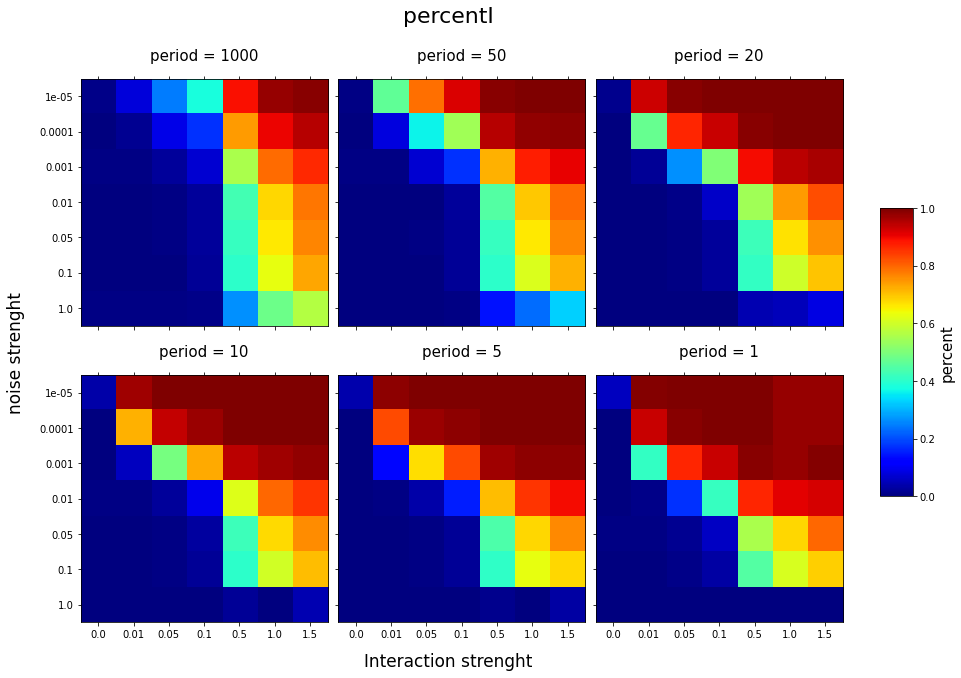

In [23]:
plotResults(variable="percent",section="I")

------
## Let's generate a few more but now with less times point. To closer simulate reality.

In [4]:
# First define the setting grid over which we want to loop.
noiseStrength = np.array([0.00001,0.0001,0.001,0.01,0.05,0.1,1])
noiseLen = len(noiseStrength)
interStength = np.array([0.,0.01,0.05,0.1,0.5,1,1.5])
interLen = len(interStength)
pertu = np.array([1000,50,20,10,5,1])
pertuLen = len(pertu)
shape = (pertuLen,noiseLen,interLen)
# 7*7*6 = 294

In [5]:
# Default
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

In [6]:
numberSpecies = 5
numberExperiments = 50

In [7]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [9]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.1)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series2/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series2/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series2/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series2/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 1.29 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 1.39 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 1.39 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 1.43 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 1.52 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 2.52 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 2.5 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 2.5 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 2.49 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 2.47 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 2.37 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 2.55 seconds
Started s=1.5, count=13/294, left = 28

Reset

In [24]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [25]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.5)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series3/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series3/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series3/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series3/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 0.27 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 0.27 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 0.29 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 0.31 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 0.34 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 0.45 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 0.61 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 0.7 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 0.61 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 0.71 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 0.63 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 0.71 seconds
Started s=1.5, count=13/294, left = 2

In [12]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [13]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.05)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series4/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series4/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series4/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series4/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 2.55 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 2.56 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 2.9 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 5.03 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 4.54 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 4.49 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 4.5 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 4.43 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 4.27 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 4.57 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 4.57 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 4.35 seconds
Started s=1.5, count=13/294, left = 28

In [14]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [15]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.02)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series5/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series5/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series5/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series5/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 13.07 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 13.32 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 13.55 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 13.32 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 13.33 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 13.3 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 14.24 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 13.46 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 13.17 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 13.25 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 13.16 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 13.23 seconds
Started s=1.5, count=13/2

Define plot functie for to plot against the Timestep

In [46]:
def plotTimeStep(variable = "percent",section="I"):
    MeanData = np.load("DataStorage/Series1/MEAN"+variable+section+".npy")
    StdData = np.load("DataStorage/Series1/STD"+variable+section+".npy")
    
    TimeStep = np.array([0.01,0.02,0.05,0.1,0.5])
    Series = np.array(["Series1","Series5","Series4","Series2","Series3"])
    
    fig, axs = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True, figsize=(15,16))
    fig.suptitle(f"{variable}{section} for different timesteps", fontsize=22)
        
    #loop over the axes
    for row, axs_row  in enumerate(axs):
        for column, ax in enumerate(axs_row):
            # create labels
            if row==0:# The top row
                ax.set_title(f"timestep = {TimeStep[column]}",fontsize=15,pad=20)
            if column==0: # The right side
                ax.set_ylabel(f"period = {pertu[row]}",fontsize=15)
            
            # Plot the data
            MeanData = np.load("DataStorage/"+Series[column]+"/MEAN"+variable+section+".npy")
            if variable=="percent":
                im = ax.matshow(MeanData[row],cmap="jet",vmin=0, vmax=1)
            else:
                im = ax.matshow(MeanData[row],cmap="jet",vmin=0, vmax=6)
    
    # Tick lables for some weird reason have to be done this way :/ 
    rightSideAxes = (axs[0][0],axs[1][0],axs[2][0],axs[3][0],axs[4][0],axs[5][0])
    lowerSideAxes = (axs[5][0],axs[5][1],axs[5][2],axs[5][3],axs[5][4])
    topSideAxes = (axs[0][0],axs[0][1],axs[0][2],axs[0][3],axs[0][4])
    for ax in rightSideAxes:
        ax.set_yticks(np.arange(7))
        ax.set_yticklabels(labels=noiseStrength)
        pass
    for ax in lowerSideAxes:
        ax.set_xticks(np.arange(7))
        ax.set_xticklabels(labels=interStength)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
    for ax in topSideAxes:
        ax.set_xticks(np.arange(7))
        ax.set_xticklabels(labels=interStength)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=False, labeltop=True)
    # Add color bar
    #cax = fig.add_axes([0.9, 0.3, 0.03, 0.4])
    #cbar = fig.colorbar(im, cax=cax)
    #cbar.set_label(variable,fontsize=15)
    # Add x and Y label
    fig.text(0.5,0.1, "Interaction strenght", ha="center", va="center",fontsize=17)
    fig.text(0.1,0.5, "noise strenght", ha="center", va="center", rotation=90,fontsize=17)  
    # adjust space between pltos
    
    plt.subplots_adjust( wspace=-0.4, hspace=None)
        

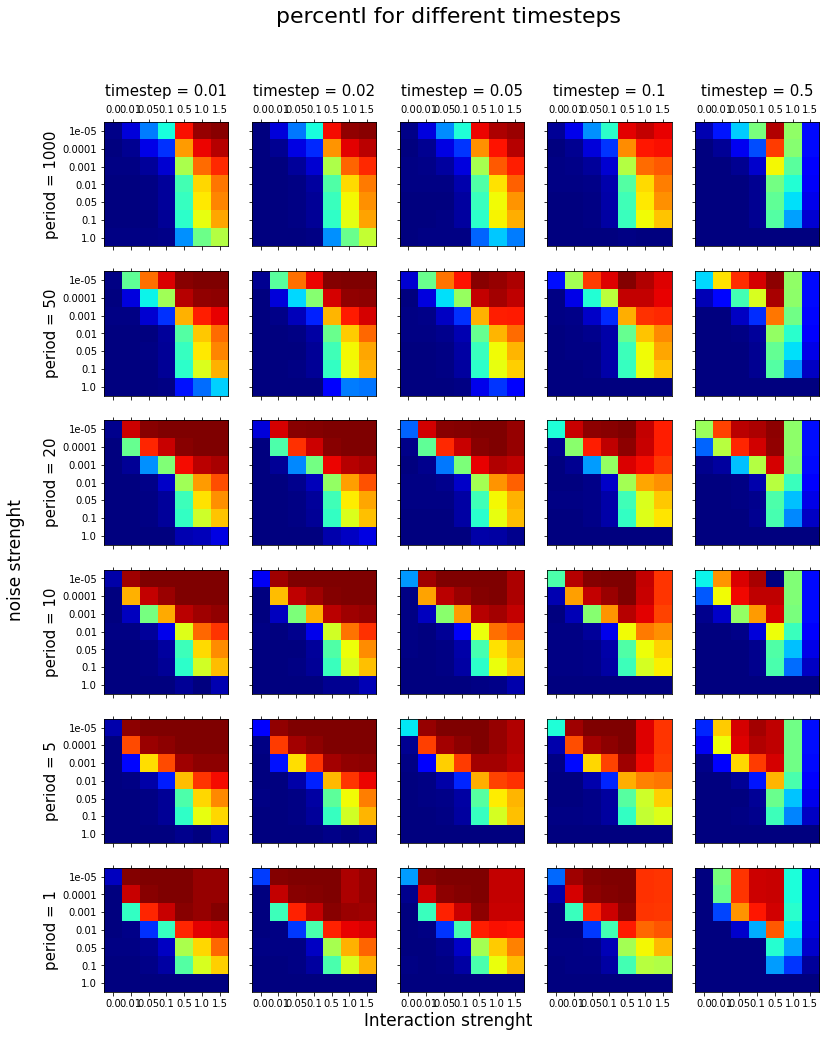

In [47]:
plotTimeStep()

Important was that series were as follows:

- TimeStep = np.array([0.01,0.02,0.05,0.1,0.5])
- Series = np.array(["Series1","Series5","Series4","Series2","Series3"])

-----
## Next point: Supsample

Look at one every other...

For this there will be a code modification in the fitGLV package.

With the computation of the GLV.

In [15]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.1
}
pertuSetting = {
    "period" : 50,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 50

The values that we are now going to evaluate are just. Are going to be log values. Such that we hopefully now nicely get a good feeling of the linear relation between noise and sigma.

I should also try to get the analytical result for this.

In [3]:
expoNoise = np.arange(-5,-0,0.5)
noises = np.power(10,expoNoise)
expoInteraction = np.arange(-4.5,0.5,0.5)
interactions = np.power(10,expoInteraction)

For the pertubation settings. I will limit myself to doing, Just 3 settings:
Only 1 pertubation in beginning.
Pertubation every 20.
Pertubation every 2

In [4]:
pertubations = np.array([10000,20,2])

------
Since for one generation we can immediatly do multiple subsample test. I will try a bunch.
Personally I think the fitting will completely fail if the distance between subsample exceeds that of the period of the model.

-> Hence it is left to see how the real world holds up to this. (We should also do a deeper investigation in for what the real world data looks like)

-> For the current model are: roughly 3 long. (meaning if the distance between subsampling is longer then 300 then it should completely fail.) But the noise makes this effect even worse because it will throw it around much more. Making in the end everything worse. 

For now I choose to focus on the close by. So I will do many low step size ones. But also a few going to large end. 

In [5]:
subSampleSteps = np.array([1,2,3,4,5,7,9,11,13,15,20,25,30,35,40,60,80,100,120,140])

Another thing. I will now not be storing the fitted results. And just store the results of the summary. The summary. In Order to just save time and space.

Another thing, Instead of saving the Mean of the summary values. I will now save the Median of the summary value. in order to account for outliers, that would maybe happen if a specific setting has bad generation and thus squess the average.

--------
redefine the store function and the store values:

In [6]:
shape = (len(pertubations),len(noises),len(interactions),len(subSampleSteps))
(MEDIANpercentG,MEDIANpercentS,MEDIANpercentI,MEDIANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEDIANmedianG,MEDIANmedianS,MEDIANmedianI,MEDIANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEDIANavgG,MEDIANavgS,MEDIANavgI,MEDIANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [8]:
def saveSummmary2(c,S,p):
    # c = coordinates, S = summary, p=path
    # First update all the data matrixes
    percentArray = np.array([S["percentG"],S["percentS"],S["percentI"],S["percentWAvg"]])
    (MEDIANpercentG[c],MEDIANpercentS[c],MEDIANpercentI[c],MEDIANpercentWAvg[c]) = np.median(percentArray,axis=1)
    (STDpercentG[c],STDpercentS[c],STDpercentI[c],STDpercentWAvg[c]) = np.std(percentArray,axis=1)
    
    medianArray = np.array([S["medianG"],S["medianS"],S["medianI"],S["medianWAvg"]])
    (MEDIANmedianG[c],MEDIANmedianS[c],MEDIANmedianI[c],MEDIANmedianWAvg[c]) = np.median(medianArray,axis=1)
    (STDmedianG[c],STDmedianS[c],STDmedianI[c],STDmedianWAvg[c]) = np.std(medianArray,axis=1)
    
    avgArray = np.array([S["avgG"],S["avgS"],S["avgI"],S["avgWAvg"]])
    (MEDIANavgG[c],MEDIANavgS[c],MEDIANavgI[c],MEDIANavgWAvg[c]) = np.median(avgArray,axis=1)
    (STDavgG[c],STDavgS[c],STDavgI[c],STDavgWAvg[c]) = np.std(avgArray,axis=1)
    
    # Now for safty if something would go wrong during generation we save at each stept the matrices!
    np.save(p+"MEDIANpercentG.npy",MEDIANpercentG)
    np.save(p+"MEDIANpercentS.npy",MEDIANpercentS)
    np.save(p+"MEDIANpercentI.npy",MEDIANpercentI)
    np.save(p+"MEDIANpercentWavg.npy",MEDIANpercentWAvg)
    np.save(p+"STDpercentG.npy",STDpercentG)
    np.save(p+"STDpercentS.npy",STDpercentS)
    np.save(p+"STDpercentI.npy",STDpercentI)
    np.save(p+"STDpercentWAvg.npy",STDpercentWAvg)
    
    np.save(p+"MEDIANmedianG.npy",MEDIANmedianG)
    np.save(p+"MEDIANmedianS.npy",MEDIANmedianS)
    np.save(p+"MEDIANmedianI.npy",MEDIANmedianI)
    np.save(p+"MEDIANmedianWAvg.npy",MEDIANmedianWAvg)
    np.save(p+"STDmedianG.npy",STDmedianG)
    np.save(p+"STDmedianS.npy",STDmedianS)
    np.save(p+"STDmedianI.npy",STDmedianI)
    np.save(p+"STDmedianWAvg.npy",STDmedianWAvg)
    
    np.save(p+"MEDIANavgG.npy",MEDIANavgG)
    np.save(p+"MEDIANavgS.npy",MEDIANavgS)
    np.save(p+"MEDIANavgI.npy",MEDIANavgI)
    np.save(p+"MEDIANavgWAvg.npy",MEDIANavgWAvg)
    np.save(p+"STDavgG.npy",STDavgG)
    np.save(p+"STDavgS.npy",STDavgS)
    np.save(p+"STDavgI.npy",STDavgI)
    np.save(p+"STDavgWAvg.npy",STDavgWAvg)

Also save the number of valid experiments! To give un idea that nothing bad happend.

In [7]:
numberOfGoodExp = np.full((len(pertubations),len(noises),len(interactions)),np.inf)

### Generation code:

In [10]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.1
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 50


count = 0
date = time.time() # First empty
for i, p in enumerate(pertubations):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noises):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interactions):
            print(f"Started s={s}, count={count}/300, left = {300-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
            TS.generate()
            numberOfGoodExp[i,j,k] = np.sum(TS.validExperiment)
            np.save("DataStorage/SubSample/numberOfGoodExp.npy",numberOfGoodExp)
            
            # Now fit over all different subsampling settings:
            for l, stepSub in enumerate(subSampleSteps):
                if stepSub==1: # aka no subsampling, then just do normal fitting:
                    fitObj = fitGLV(TS)
                else:
                    fitObj = fitGLV(TS,stepSample=stepSub)
                fitObj.computeNullHypo()
            
                # Store the wanted values in seperate matrixes
                saveSummmary2((i,j,k,l),fitObj.nullSummary,f"DataStorage/SubSample/")

Started p=10000
Started n=1e-05
Started s=3.1622776601683795e-05, count=0/300, left = 300, Time last loop = 0.0 seconds
Started s=0.0001, count=1/300, left = 299, Time last loop = 53.33 seconds
Started s=0.00031622776601683794, count=2/300, left = 298, Time last loop = 52.68 seconds
Started s=0.001, count=3/300, left = 297, Time last loop = 53.19 seconds
Started s=0.0031622776601683794, count=4/300, left = 296, Time last loop = 50.7 seconds
Started s=0.01, count=5/300, left = 295, Time last loop = 49.42 seconds
Started s=0.03162277660168379, count=6/300, left = 294, Time last loop = 51.94 seconds
Started s=0.1, count=7/300, left = 293, Time last loop = 52.05 seconds
Started s=0.31622776601683794, count=8/300, left = 292, Time last loop = 52.65 seconds
Started s=1.0, count=9/300, left = 291, Time last loop = 54.46 seconds
Started n=3.1622776601683795e-05
Started s=3.1622776601683795e-05, count=10/300, left = 290, Time last loop = 66.72 seconds
Started s=0.0001, count=11/300, left = 289,

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/generateGLV.py:219: RuntimeWarning: overflow encountered in multiply
  if self.parametersAreGen == False:


Started n=0.31622776601683794
Started s=3.1622776601683795e-05, count=90/300, left = 210, Time last loop = 52.48 seconds
Started s=0.0001, count=91/300, left = 209, Time last loop = 51.64 seconds
Started s=0.00031622776601683794, count=92/300, left = 208, Time last loop = 49.7 seconds
Started s=0.001, count=93/300, left = 207, Time last loop = 49.81 seconds
Started s=0.0031622776601683794, count=94/300, left = 206, Time last loop = 48.94 seconds
Started s=0.01, count=95/300, left = 205, Time last loop = 47.28 seconds
Started s=0.03162277660168379, count=96/300, left = 204, Time last loop = 52.47 seconds
Started s=0.1, count=97/300, left = 203, Time last loop = 51.06 seconds
Started s=0.31622776601683794, count=98/300, left = 202, Time last loop = 49.13 seconds
Started s=1.0, count=99/300, left = 201, Time last loop = 47.0 seconds
Started p=20
Started n=1e-05
Started s=3.1622776601683795e-05, count=100/300, left = 200, Time last loop = 51.88 seconds
Started s=0.0001, count=101/300, left

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/generateGLV.py:174: RuntimeWarning: invalid value encountered in add
  self.hasPerturbed[experiment, i] = True


Started n=0.31622776601683794
Started s=3.1622776601683795e-05, count=190/300, left = 110, Time last loop = 62.22 seconds
Started s=0.0001, count=191/300, left = 109, Time last loop = 63.21 seconds
Started s=0.00031622776601683794, count=192/300, left = 108, Time last loop = 65.25 seconds
Started s=0.001, count=193/300, left = 107, Time last loop = 56.12 seconds
Started s=0.0031622776601683794, count=194/300, left = 106, Time last loop = 57.55 seconds
Started s=0.01, count=195/300, left = 105, Time last loop = 56.42 seconds
Started s=0.03162277660168379, count=196/300, left = 104, Time last loop = 60.53 seconds
Started s=0.1, count=197/300, left = 103, Time last loop = 67.48 seconds
Started s=0.31622776601683794, count=198/300, left = 102, Time last loop = 66.7 seconds
Started s=1.0, count=199/300, left = 101, Time last loop = 61.75 seconds
Started p=2
Started n=1e-05
Started s=3.1622776601683795e-05, count=200/300, left = 100, Time last loop = 59.97 seconds


/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:65: RuntimeWarning: divide by zero encountered in power
  normFactor = np.power(float(YPredict.shape[-2] - self.BEst.shape[0]),-1) # We estimate var per species, hence we need number of degree of one species which is shape[0]
/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:95: RuntimeWarning: invalid value encountered in sqrt
  Z = self.BEst/np.sqrt(self.varBEst)
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = 

Started s=0.0001, count=201/300, left = 99, Time last loop = 65.71 seconds
Started s=0.00031622776601683794, count=202/300, left = 98, Time last loop = 57.72 seconds
Started s=0.001, count=203/300, left = 97, Time last loop = 56.01 seconds
Started s=0.0031622776601683794, count=204/300, left = 96, Time last loop = 52.19 seconds
Started s=0.01, count=205/300, left = 95, Time last loop = 52.77 seconds
Started s=0.03162277660168379, count=206/300, left = 94, Time last loop = 53.78 seconds
Started s=0.1, count=207/300, left = 93, Time last loop = 55.51 seconds
Started s=0.31622776601683794, count=208/300, left = 92, Time last loop = 57.07 seconds
Started s=1.0, count=209/300, left = 91, Time last loop = 53.99 seconds
Started n=3.1622776601683795e-05
Started s=3.1622776601683795e-05, count=210/300, left = 90, Time last loop = 53.44 seconds
Started s=0.0001, count=211/300, left = 89, Time last loop = 51.7 seconds
Started s=0.00031622776601683794, count=212/300, left = 88, Time last loop = 54

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:148: RuntimeWarning: invalid value encountered in log
  dln = np.diff(np.log(validResult),axis=-2) # Axis =-1 is species, -2 = temporal, -3 and higher is experiment and batch
/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:196: RuntimeWarning: invalid value encountered in log
  dln = np.diff(np.log(result),axis=-2)


Started s=0.31622776601683794, count=298/300, left = 2, Time last loop = 32.69 seconds
Started s=1.0, count=299/300, left = 1, Time last loop = 33.65 seconds


After a close inspection.
It seemed that there was a mistake in the code with the variance! And that it would have a very large influance on data where there are not taht many points to work with (aka when subsample is high!). So... -> reRun the code.

In [9]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.1
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 50


count = 0
date = time.time() # First empty
for i, p in enumerate(pertubations):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noises):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interactions):
            print(f"Started s={s}, count={count}/300, left = {300-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
            TS.generate()
            numberOfGoodExp[i,j,k] = np.sum(TS.validExperiment)
            np.save("DataStorage/SubSampleBis/numberOfGoodExp.npy",numberOfGoodExp)
            
            # Now fit over all different subsampling settings:
            for l, stepSub in enumerate(subSampleSteps):
                if stepSub==1: # aka no subsampling, then just do normal fitting:
                    fitObj = fitGLV(TS)
                else:
                    fitObj = fitGLV(TS,stepSample=stepSub)
                fitObj.computeNullHypo()
            
                # Store the wanted values in seperate matrixes
                saveSummmary2((i,j,k,l),fitObj.nullSummary,f"DataStorage/SubSampleBis/")

Started p=10000
Started n=1e-05
Started s=3.1622776601683795e-05, count=0/300, left = 300, Time last loop = 0.0 seconds
Started s=0.0001, count=1/300, left = 299, Time last loop = 22.13 seconds
Started s=0.00031622776601683794, count=2/300, left = 298, Time last loop = 26.94 seconds
Started s=0.001, count=3/300, left = 297, Time last loop = 25.75 seconds
Started s=0.0031622776601683794, count=4/300, left = 296, Time last loop = 23.28 seconds
Started s=0.01, count=5/300, left = 295, Time last loop = 22.95 seconds
Started s=0.03162277660168379, count=6/300, left = 294, Time last loop = 23.34 seconds
Started s=0.1, count=7/300, left = 293, Time last loop = 23.51 seconds
Started s=0.31622776601683794, count=8/300, left = 292, Time last loop = 22.65 seconds
Started s=1.0, count=9/300, left = 291, Time last loop = 22.49 seconds
Started n=3.1622776601683795e-05
Started s=3.1622776601683795e-05, count=10/300, left = 290, Time last loop = 22.87 seconds
Started s=0.0001, count=11/300, left = 289

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/generateGLV.py:222: RuntimeWarning: overflow encountered in multiply
  return currentState*(self.growth[self.e] + np.dot(currentState,self.interactionMatrix[self.e]))


Started n=0.31622776601683794
Started s=3.1622776601683795e-05, count=90/300, left = 210, Time last loop = 21.39 seconds
Started s=0.0001, count=91/300, left = 209, Time last loop = 21.26 seconds
Started s=0.00031622776601683794, count=92/300, left = 208, Time last loop = 21.59 seconds
Started s=0.001, count=93/300, left = 207, Time last loop = 21.38 seconds
Started s=0.0031622776601683794, count=94/300, left = 206, Time last loop = 21.42 seconds
Started s=0.01, count=95/300, left = 205, Time last loop = 21.41 seconds
Started s=0.03162277660168379, count=96/300, left = 204, Time last loop = 21.16 seconds
Started s=0.1, count=97/300, left = 203, Time last loop = 21.25 seconds
Started s=0.31622776601683794, count=98/300, left = 202, Time last loop = 21.33 seconds
Started s=1.0, count=99/300, left = 201, Time last loop = 21.08 seconds
Started p=20
Started n=1e-05
Started s=3.1622776601683795e-05, count=100/300, left = 200, Time last loop = 21.36 seconds
Started s=0.0001, count=101/300, le

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/generateGLV.py:179: RuntimeWarning: invalid value encountered in add
  self.result[experiment,i+1] = self.result[experiment,i] + self.modelDiff[experiment,i+1] + self.noiseDiff[experiment,i+1] + pertubation


Started n=0.31622776601683794
Started s=3.1622776601683795e-05, count=190/300, left = 110, Time last loop = 22.18 seconds
Started s=0.0001, count=191/300, left = 109, Time last loop = 22.85 seconds
Started s=0.00031622776601683794, count=192/300, left = 108, Time last loop = 22.47 seconds
Started s=0.001, count=193/300, left = 107, Time last loop = 22.34 seconds
Started s=0.0031622776601683794, count=194/300, left = 106, Time last loop = 21.52 seconds
Started s=0.01, count=195/300, left = 105, Time last loop = 21.29 seconds
Started s=0.03162277660168379, count=196/300, left = 104, Time last loop = 21.19 seconds
Started s=0.1, count=197/300, left = 103, Time last loop = 22.47 seconds
Started s=0.31622776601683794, count=198/300, left = 102, Time last loop = 22.53 seconds
Started s=1.0, count=199/300, left = 101, Time last loop = 22.32 seconds
Started p=2
Started n=1e-05
Started s=3.1622776601683795e-05, count=200/300, left = 100, Time last loop = 22.34 seconds
Started s=0.0001, count=20

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:147: RuntimeWarning: invalid value encountered in log
  dln = np.diff(np.log(validResult),axis=-2) # Axis =-1 is species, -2 = temporal, -3 and higher is experiment and batch
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:105: RuntimeWarning: invalid value encountered in greater
  self.pNull[self.pNull>1] = 1 # When multiplied by num

Started s=0.31622776601683794, count=298/300, left = 2, Time last loop = 22.33 seconds
Started s=1.0, count=299/300, left = 1, Time last loop = 21.56 seconds


Do it again but now also with self interaction with the correct matrix.

In [10]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.1
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 50


count = 0
date = time.time() # First empty
for i, p in enumerate(pertubations):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noises):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interactions):
            print(f"Started s={s}, count={count}/300, left = {300-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
            TS.generate()
            numberOfGoodExp[i,j,k] = np.sum(TS.validExperiment)
            np.save("DataStorage/SubSampleBis/Self_numberOfGoodExp.npy",numberOfGoodExp)
            
            # Now fit over all different subsampling settings:
            for l, stepSub in enumerate(subSampleSteps):
                if stepSub==1: # aka no subsampling, then just do normal fitting:
                    fitObj = fitGLV(TS)
                else:
                    fitObj = fitGLV(TS,stepSample=stepSub)
                _, _, Summary = fitObj.hypo(fitObj.trueMat,plot=False)
            
                # Store the wanted values in seperate matrixes
                saveSummmary2((i,j,k,l),Summary,f"DataStorage/SubSampleBis/Self_")

Started p=10000
Started n=1e-05
Started s=3.1622776601683795e-05, count=0/300, left = 300, Time last loop = 0.0 seconds
Started s=0.0001, count=1/300, left = 299, Time last loop = 17.88 seconds
Started s=0.00031622776601683794, count=2/300, left = 298, Time last loop = 23.91 seconds
Started s=0.001, count=3/300, left = 297, Time last loop = 21.85 seconds
Started s=0.0031622776601683794, count=4/300, left = 296, Time last loop = 21.73 seconds
Started s=0.01, count=5/300, left = 295, Time last loop = 21.72 seconds
Started s=0.03162277660168379, count=6/300, left = 294, Time last loop = 21.84 seconds
Started s=0.1, count=7/300, left = 293, Time last loop = 21.66 seconds
Started s=0.31622776601683794, count=8/300, left = 292, Time last loop = 21.28 seconds
Started s=1.0, count=9/300, left = 291, Time last loop = 21.59 seconds
Started n=3.1622776601683795e-05
Started s=3.1622776601683795e-05, count=10/300, left = 290, Time last loop = 21.6 seconds
Started s=0.0001, count=11/300, left = 289,

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/generateGLV.py:222: RuntimeWarning: overflow encountered in multiply
  return currentState*(self.growth[self.e] + np.dot(currentState,self.interactionMatrix[self.e]))


Started n=0.31622776601683794
Started s=3.1622776601683795e-05, count=90/300, left = 210, Time last loop = 21.62 seconds
Started s=0.0001, count=91/300, left = 209, Time last loop = 21.5 seconds
Started s=0.00031622776601683794, count=92/300, left = 208, Time last loop = 21.41 seconds
Started s=0.001, count=93/300, left = 207, Time last loop = 21.66 seconds
Started s=0.0031622776601683794, count=94/300, left = 206, Time last loop = 21.45 seconds
Started s=0.01, count=95/300, left = 205, Time last loop = 21.42 seconds
Started s=0.03162277660168379, count=96/300, left = 204, Time last loop = 21.53 seconds
Started s=0.1, count=97/300, left = 203, Time last loop = 21.45 seconds
Started s=0.31622776601683794, count=98/300, left = 202, Time last loop = 21.25 seconds
Started s=1.0, count=99/300, left = 201, Time last loop = 21.48 seconds
Started p=20
Started n=1e-05
Started s=3.1622776601683795e-05, count=100/300, left = 200, Time last loop = 21.14 seconds
Started s=0.0001, count=101/300, lef

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/generateGLV.py:179: RuntimeWarning: invalid value encountered in add
  self.result[experiment,i+1] = self.result[experiment,i] + self.modelDiff[experiment,i+1] + self.noiseDiff[experiment,i+1] + pertubation


Started n=0.31622776601683794
Started s=3.1622776601683795e-05, count=190/300, left = 110, Time last loop = 25.39 seconds
Started s=0.0001, count=191/300, left = 109, Time last loop = 27.38 seconds
Started s=0.00031622776601683794, count=192/300, left = 108, Time last loop = 25.33 seconds
Started s=0.001, count=193/300, left = 107, Time last loop = 26.18 seconds
Started s=0.0031622776601683794, count=194/300, left = 106, Time last loop = 25.43 seconds
Started s=0.01, count=195/300, left = 105, Time last loop = 24.2 seconds
Started s=0.03162277660168379, count=196/300, left = 104, Time last loop = 31.07 seconds
Started s=0.1, count=197/300, left = 103, Time last loop = 27.87 seconds
Started s=0.31622776601683794, count=198/300, left = 102, Time last loop = 25.41 seconds
Started s=1.0, count=199/300, left = 101, Time last loop = 23.94 seconds
Started p=2
Started n=1e-05
Started s=3.1622776601683795e-05, count=200/300, left = 100, Time last loop = 23.37 seconds
Started s=0.0001, count=201

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:147: RuntimeWarning: invalid value encountered in log
  dln = np.diff(np.log(validResult),axis=-2) # Axis =-1 is species, -2 = temporal, -3 and higher is experiment and batch
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/lennart/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/PostFWO/fitGLV.py:124: RuntimeWarning: invalid value encountered in greater
  p[p>1]=1 # When multiplied by number of parameters. P

Started s=0.31622776601683794, count=298/300, left = 2, Time last loop = 45.85 seconds
Started s=1.0, count=299/300, left = 1, Time last loop = 46.14 seconds


--------
## Plotting subsampled results

In [3]:
# Have it again just so the code is close by. 
expoNoise = np.arange(-5,-0,0.5)
noises = np.power(10,expoNoise)
expoInteraction = np.arange(-4.5,0.5,0.5)
interactions = np.power(10,expoInteraction)
pertubations = np.array([10000,20,2])
subSampleSteps = np.array([1,2,3,4,5,7,9,11,13,15,20,25,30,35,40,60,80,100,120,140])

In [4]:
def plotSubSampMatrix(variable = "percent",section="I", stepSamples = (1,2,3), Self = False):
    # Load wanted data
    if variable == "numberOfGoodExp":
        path = "numberOfGoodExp.npy"
    else:
        path = "MEDIAN"+variable+section+".npy"
    if Self:
        path = "Self_" +  path
    medianData = np.load("DataStorage/SubSampleBis/"+path)
    
    fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(15,15))
    fig.suptitle(f"Median {variable}{section} subsampled", fontsize=22)
        
    #loop over the axes
    
    for row, axs_row  in enumerate(axs):
        
        for column, ax in enumerate(axs_row):
            # create labels
            if row==0:# The top row
                ax.set_title(f"stepSamples = {stepSamples[column]}",fontsize=15)
            if column==0: # The right side
                ax.set_ylabel(f"period = {pertubations[row]}",fontsize=15)
            
            l = np.where(subSampleSteps==stepSamples[column])[0][0] # get back the correct index
            
            # Plot the data
            if variable=="percent":
                im = ax.matshow(medianData[row,:,:,l],cmap="jet",vmin=0, vmax=1)
            elif variable == "numberOfGoodExp":
                im = ax.matshow(medianData[row]/50,cmap="jet",vmin=0, vmax=1)
            else:
                im = ax.matshow(medianData[row,:,:,l],cmap="jet",vmin=0, vmax=6)
            
    
    # Tick lables for some weird reason have to be done this way :/ 
    rightSideAxes = (axs[0][0],axs[1][0],axs[2][0])
    lowerSideAxes = (axs[2][0],axs[2][1],axs[2][2])
    topSideAxes = (axs[0][0],axs[0][1],axs[0][2])
    for ax in rightSideAxes:
        ax.set_yticks(np.arange(len(expoNoise)))
        ax.set_yticklabels(labels=expoNoise)
    for ax in lowerSideAxes:
        ax.set_xticks(np.arange(len(expoInteraction)))
        ax.set_xticklabels(labels=expoInteraction)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
    for ax in topSideAxes:
        pass
        #ax.set_xticks(np.arange(7))
        #ax.set_xticklabels(labels=interStength)
        #ax.tick_params(axis="x", bottom=True, top=True, labelbottom=False, labeltop=True)
    # Add color bar
    cax = fig.add_axes([0.9, 0.3, 0.03, 0.4])
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label(variable,fontsize=15)
    # Add x and Y label
    fig.text(0.5,0.1, "Log. Interaction strenght", ha="center", va="center",fontsize=17)
    fig.text(0.07,0.5, "Log. noise strenght", ha="center", va="center", rotation=90,fontsize=17)  
    # adjust space between pltos
    
    plt.subplots_adjust( wspace=0, hspace=0.02)
        

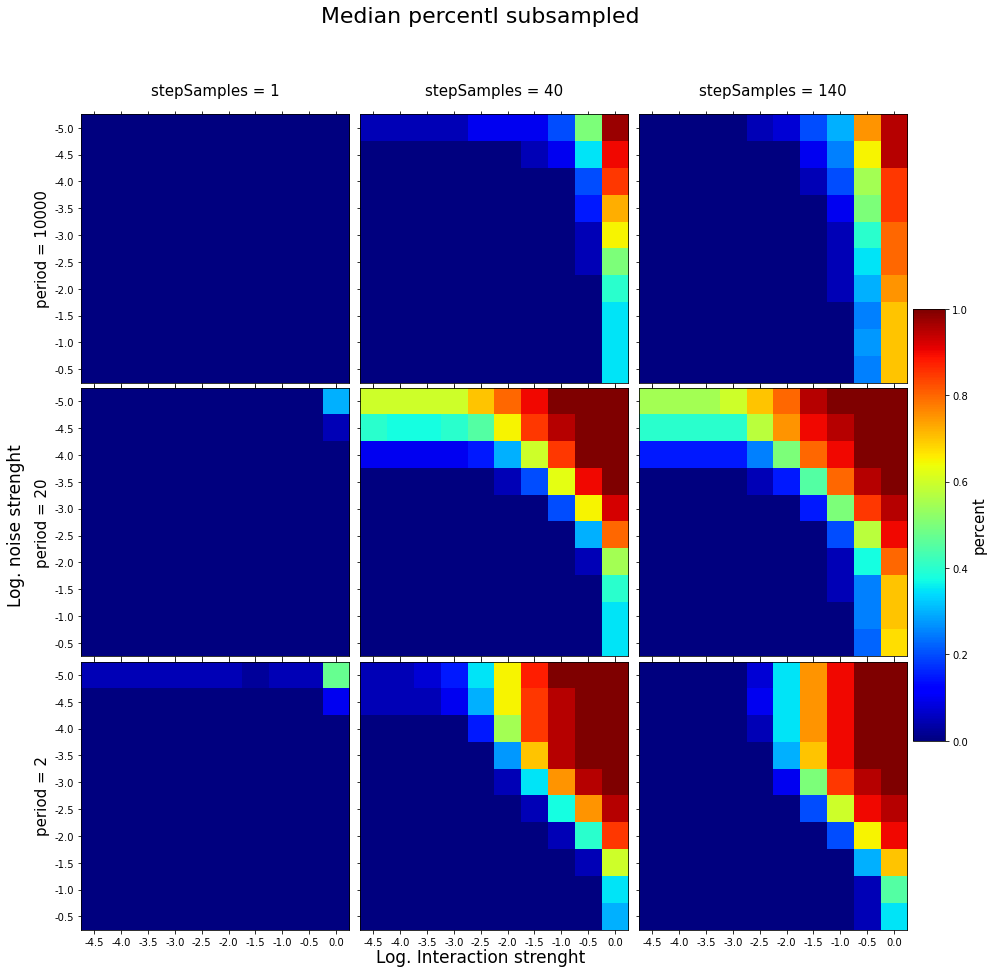

In [7]:
plotSubSampMatrix("percent","I",stepSamples=(1,40,140),Self=True)

## Results of the plot:

The results are really nice and fun to look at. Here I want to highlight some of the 

main results looking at Null Hypo:

1. There is a clear Linear relation between the noise and interaction strenght where the iso-lines follow a slope with 1. (This feeling I had before but now i really took the linear relation for once voila)
2. Shortening the pertubation period. Just shifts the intersection of the iso-lines. It does not affect the slope!. ( I should find a good method to estimate this slope).
3. For null hypothesis. (self hypothesis needs to be tested). It is pretty robust. (much more then I thought). -> There is practally no difference between subsampling 1,2,3. -> Only at of large subsamples does it become clear. 
4. For large subsamples and low noise -> with increasing stepSamples, it will say it is (more) significant at low interaction. (low noise) -> evidence that it inferece the data wrongly.
5. Subsampling. In generally decreases the signifcance of null hypothesis (but this) sub sampling needs to be large however.
6. Growthrate: When noise to high (-1.5,-0.5) noise inference can be bad (especially when there are not that many points (low period, high stepsample)
7. SelfInteraction: Always significant (only with low amount of points -> and high noise it can fail)

number of Good Experiments results:

1. Only at really low period and high interaction strenght. Does it become a problem (60%) level.
2. For period 2 we do see a lower level (95%) at highest noise level. 
3. The rest is all 100% Succes!

p-value results of selfInteractions (here significances is bad!)
1. Look at percent I:
    1. p-value Significance is much more suseptible to stepSample. Already a large difference between (1,2,3).
    2. iso-levels of significance follow again power law! (with what seems to be again slope 1. 
    3. Increasing levels of stepSamples significantly increases the significance. -> Significantly shift the interaction.
    4. More pertubations can also make the situation worse! -> No idea why this happens (since this effect is already seen at only 1,2,3 subsamples. -> Which does lower your amount of available points. (by /2 and /3) But still the significnace is great at only 1 Pertubation. So I don't really understand why pertubation makes it worse :/ 
    5. Playing around with subSamples:
        1. There is a large difference between 1,2,3
        2. There is large difference between 3,5 then there is a between 2,3 -> Strange. (Or maybe not)
        3. Again differnce between 5,15 -> Not large
        4. Looking at extremely high subSampling (140). It seems that the -> Significnance level approaches the same ISO-levels as that of null-hypo. And that the only reason on why it is still Blue in the region below the (iso-line) is because the STD of the fitted Paramter is just so large. That both null and real hypo are in within the significnance region.
        
2. Look at percent G:
    1. Same relation. -> But now that the slope is much more vertical. and basically low noise terms are signifcant. -> Which is actually weird. one would expect that high noise terms would be Significant. 
    2. And the weird role of pertubation... I do not know why pertubation and low noise result in wrong inference when we subSample. (Theory is maybe that with high noise the variance is just big. -> hence less significant.) -> Probably it. But again what has this to do with the pertubations...
    3. No interaction dependece. (which is logical except at higher interaction strenght. (deviation). 
    4. At extreme high subsamples (140) the inference is less good. (no pertubation)
    
3. Looking at percent S:
    1. Same results as G. (actually a bit worses when viewing high subsamples)
    


--------


Things to do:

- Understand why pertubation -> worsens result.
     - Hypothesis: not relax = problem (investigate)
     - Hypothesis: Numerical errors... (but how?)
     - How does this ty into the subsampling? Is it the same problem?
- Start at 0.005 -> Sub sample to 0.01. Does it compare to the results we already have?
- Why inference bad if there is no noise ? (low noise)


